### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [ ]:
ingreso_tienda = tienda['Precio'].sum()
ingreso_tienda2 = tienda2['Precio'].sum()
ingreso_tienda3 = tienda3['Precio'].sum()
ingreso_tienda4 = tienda4['Precio'].sum()

resultados_ingresos = pd.DataFrame({
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Ingreso Total': [ingreso_tienda, ingreso_tienda2, ingreso_tienda3, ingreso_tienda4]
})

resultados_ingresos['Ingreso Total'] = resultados_ingresos['Ingreso Total'].astype(int).map('{:,.0f}'.format)

print(resultados_ingresos)

     Tienda  Ingreso Total
0  Tienda 1  1,150,880,400
1  Tienda 2  1,116,343,500
2  Tienda 3  1,098,019,600
3  Tienda 4  1,038,375,700


# 2. Ventas por categoría

In [ ]:

dataframes = [
    (tienda, 'Tienda 1'),
    (tienda2, 'Tienda 2'),
    (tienda3, 'Tienda 3'),
    (tienda4, 'Tienda 4')
]

all_data = []

for df, store_name in dataframes:
    ventas_categoria = df.groupby('Categoría del Producto').size().reset_index(name='Cantidad de Ventas')
    ventas_categoria['Tienda'] = store_name
    all_data.append(ventas_categoria)

ventas_por_tienda_categoria = pd.concat(all_data, ignore_index=True)
ventas_por_tienda_categoria = ventas_por_tienda_categoria.sort_values(
    by=['Tienda', 'Cantidad de Ventas'],
    ascending=[True, False]
).reset_index(drop=True)

print(ventas_por_tienda_categoria)

     Categoría del Producto  Cantidad de Ventas    Tienda
0                   Muebles                 465  Tienda 1
1              Electrónicos                 448  Tienda 1
2                  Juguetes                 324  Tienda 1
3         Electrodomésticos                 312  Tienda 1
4      Deportes y diversión                 284  Tienda 1
5    Instrumentos musicales                 182  Tienda 1
6                    Libros                 173  Tienda 1
7   Artículos para el hogar                 171  Tienda 1
8                   Muebles                 442  Tienda 2
9              Electrónicos                 422  Tienda 2
10                 Juguetes                 313  Tienda 2
11        Electrodomésticos                 305  Tienda 2
12     Deportes y diversión                 275  Tienda 2
13   Instrumentos musicales                 224  Tienda 2
14                   Libros                 197  Tienda 2
15  Artículos para el hogar                 181  Tienda 2
16            

# 3. Calificación promedio de la tienda


In [ ]:
dataframes = [
    (tienda, 'Tienda 1'),
    (tienda2, 'Tienda 2'),
    (tienda3, 'Tienda 3'),
    (tienda4, 'Tienda 4')
]

all_data = []

for df, store_name in dataframes:

    promedio_calificacion = df['Calificación'].mean()
    all_data.append({'Tienda': store_name, 'Calificación Promedio': promedio_calificacion})

resultados_df = pd.DataFrame(all_data)
resultados_df = resultados_df.sort_values(by='Calificación Promedio', ascending=False).reset_index(drop=True)

resultados_df['Calificación Promedio'] = resultados_df['Calificación Promedio'].map('{:.2f}'.format)

print(resultados_df)

     Tienda Calificación Promedio
0  Tienda 3                  4.05
1  Tienda 2                  4.04
2  Tienda 4                  4.00
3  Tienda 1                  3.98


# 4. Productos más y menos vendidos

In [ ]:
dataframes = [
    (tienda, 'Tienda 1'),
    (tienda2, 'Tienda 2'),
    (tienda3, 'Tienda 3'),
    (tienda4, 'Tienda 4')
]

top_products = []
bottom_products = []

for df, store_name in dataframes:
    ventas_producto = df['Producto'].value_counts()

    top_5 = ventas_producto.head(5).reset_index()
    top_5.columns = ['Producto', 'Cantidad de Ventas']
    top_5['Tienda'] = store_name

    bottom_5 = ventas_producto.tail(5).reset_index()
    bottom_5.columns = ['Producto', 'Cantidad de Ventas']
    bottom_5['Tienda'] = store_name

    top_products.append((store_name, top_5))
    bottom_products.append((store_name, bottom_5))

print("--- Productos Más Vendidos por Tienda ---")
for store_name, df in top_products:
    print(f"\n{store_name}:")
    print(df[['Producto', 'Cantidad de Ventas']])

print("\n--- Productos Menos Vendidos por Tienda ---")
for store_name, df in bottom_products:
    print(f"\n{store_name}:")
    print(df[['Producto', 'Cantidad de Ventas']])

--- Productos Más Vendidos por Tienda ---

Tienda 1:
           Producto  Cantidad de Ventas
0        Microondas                  60
1     TV LED UHD 4K                  60
2           Armario                  60
3  Secadora de ropa                  58
4     Mesa de noche                  56

Tienda 2:
                    Producto  Cantidad de Ventas
0  Iniciando en programación                  65
1                 Microondas                  62
2                    Batería                  61
3          Guitarra acústica                  58
4                  Pandereta                  58

Tienda 3:
          Producto  Cantidad de Ventas
0    Kit de bancas                  57
1  Mesa de comedor                  56
2        Cama king                  56
3     Set de ollas                  55
4    Mesa de noche                  55

Tienda 4:
                    Producto  Cantidad de Ventas
0                   Cama box                  62
1                 Cubertería                  59

# 5. Envío promedio por tienda

In [ ]:
dataframes = [
    (tienda, 'Tienda 1'),
    (tienda2, 'Tienda 2'),
    (tienda3, 'Tienda 3'),
    (tienda4, 'Tienda 4')
]

all_data = []

for df, store_name in dataframes:

    promedio_envio = df['Costo de envío'].mean()
    all_data.append({'Tienda': store_name, 'Costo de Envío Promedio': promedio_envio})

resultados_df = pd.DataFrame(all_data)
resultados_df = resultados_df.sort_values(by='Costo de Envío Promedio', ascending=False).reset_index(drop=True)

resultados_df['Costo de Envío Promedio'] = resultados_df['Costo de Envío Promedio'].round(0).astype(float).map('{:,.0f}'.format)

print(resultados_df)

     Tienda Costo de Envío Promedio
0  Tienda 1                  26,019
1  Tienda 2                  25,216
2  Tienda 3                  24,806
3  Tienda 4                  23,459


# 6. graficos

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
colores_alaska = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f']

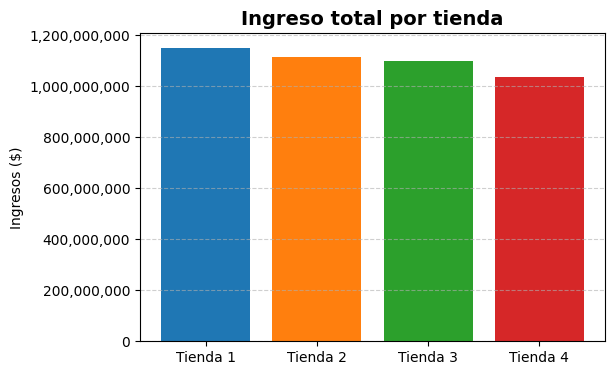

In [ ]:
ingresos = [tienda['Precio'].sum(), tienda2['Precio'].sum(), tienda3['Precio'].sum(), tienda4['Precio'].sum()]

plt.figure(figsize=(6,4))
plt.bar(tiendas, ingresos, color=colores_alaska)
plt.title('Ingreso total por tienda', fontsize=14, fontweight='bold')
plt.ylabel('Ingresos ($)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.show()

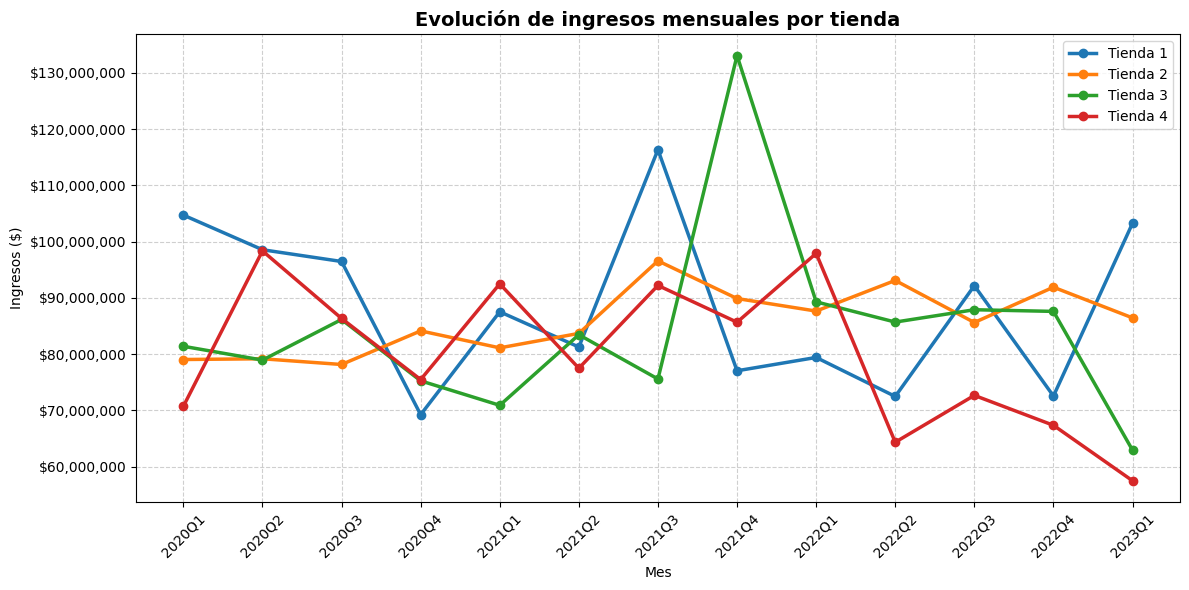

In [ ]:
tienda['Fecha de Compra'] = pd.to_datetime(tienda['Fecha de Compra'], dayfirst=True)
tienda2['Fecha de Compra'] = pd.to_datetime(tienda2['Fecha de Compra'], dayfirst=True)
tienda3['Fecha de Compra'] = pd.to_datetime(tienda3['Fecha de Compra'], dayfirst=True)
tienda4['Fecha de Compra'] = pd.to_datetime(tienda4['Fecha de Compra'], dayfirst=True)

tienda['Mes'] = tienda['Fecha de Compra'].dt.to_period('Q')
tienda2['Mes'] = tienda2['Fecha de Compra'].dt.to_period('Q')
tienda3['Mes'] = tienda3['Fecha de Compra'].dt.to_period('Q')
tienda4['Mes'] = tienda4['Fecha de Compra'].dt.to_period('Q')

t1_mes = tienda.groupby('Mes')['Precio'].sum()
t2_mes = tienda2.groupby('Mes')['Precio'].sum()
t3_mes = tienda3.groupby('Mes')['Precio'].sum()
t4_mes = tienda4.groupby('Mes')['Precio'].sum()

plt.figure(figsize=(12,6))
plt.plot(t1_mes.index.astype(str), t1_mes.values, label='Tienda 1', color=colores_alaska[0], linewidth=2.5, marker='o')
plt.plot(t2_mes.index.astype(str), t2_mes.values, label='Tienda 2', color=colores_alaska[1], linewidth=2.5, marker='o')
plt.plot(t3_mes.index.astype(str), t3_mes.values, label='Tienda 3', color=colores_alaska[2], linewidth=2.5, marker='o')
plt.plot(t4_mes.index.astype(str), t4_mes.values, label='Tienda 4', color=colores_alaska[3], linewidth=2.5, marker='o')

plt.title('Evolución de ingresos mensuales por tienda', fontsize=14, fontweight='bold')
plt.xlabel('Mes')
plt.ylabel('Ingresos ($)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x):,}'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

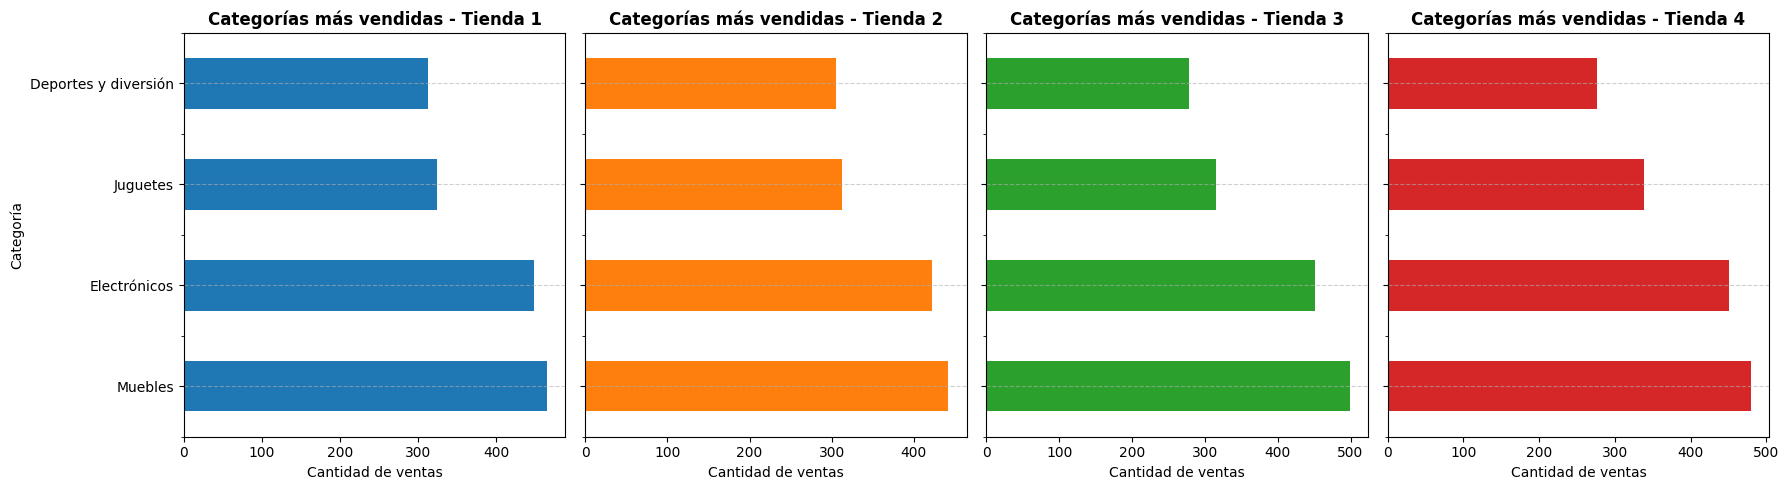

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(18, 5), sharey=True)

for ax, data, name, color in zip(axes, [tienda, tienda2, tienda3, tienda4], tiendas, colores_alaska):
    top_categorias = data['Categoría del Producto'].value_counts().head(4)
    top_categorias.plot(kind='barh', ax=ax, color=color)
    ax.set_title(f'Categorías más vendidas - {name}', fontsize=12, fontweight='bold')
    ax.set_xlabel('Cantidad de ventas')
    ax.set_ylabel('Categoría')
    ax.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

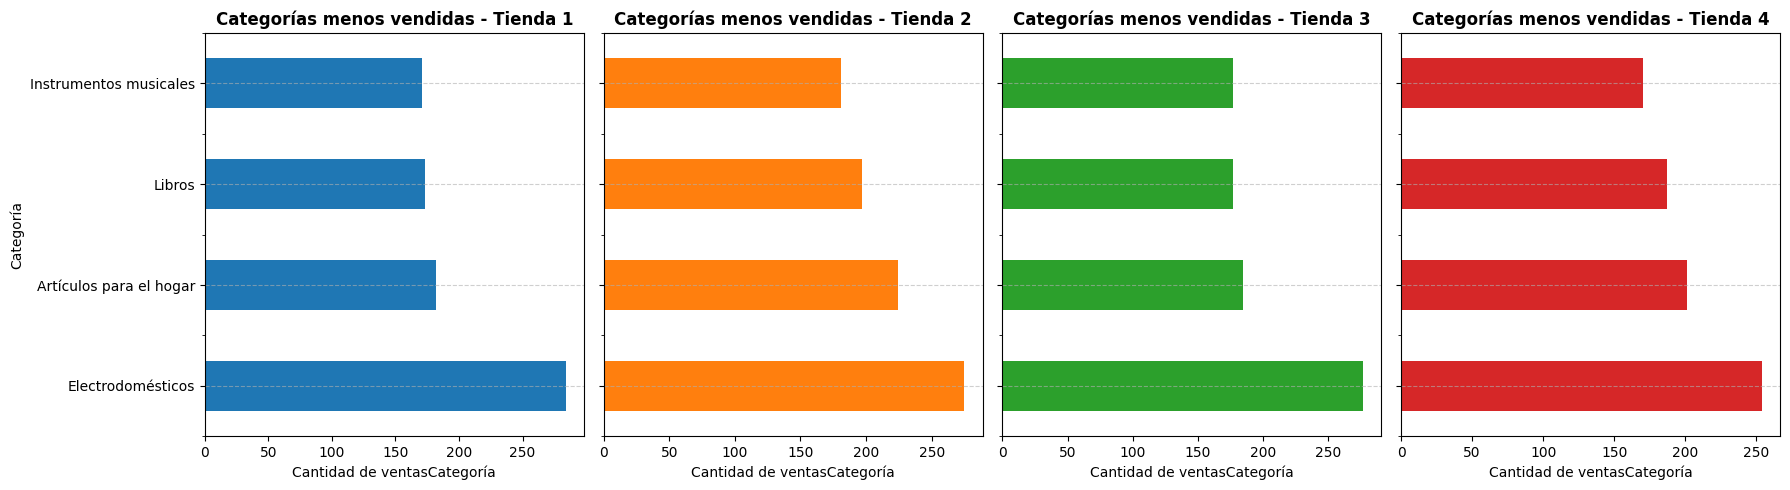

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(18, 5), sharey=True)

for ax, data, name, color in zip(axes, [tienda, tienda2, tienda3, tienda4], tiendas, colores_alaska):
    top_categorias = data['Categoría del Producto'].value_counts().tail(4)
    top_categorias.plot(kind='barh', ax=ax, color=color)
    ax.set_title(f'Categorías menos vendidas - {name}', fontsize=12, fontweight='bold')
    ax.set_xlabel('Cantidad de ventas')
    ax.set_ylabel('Categoría')
    ax.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

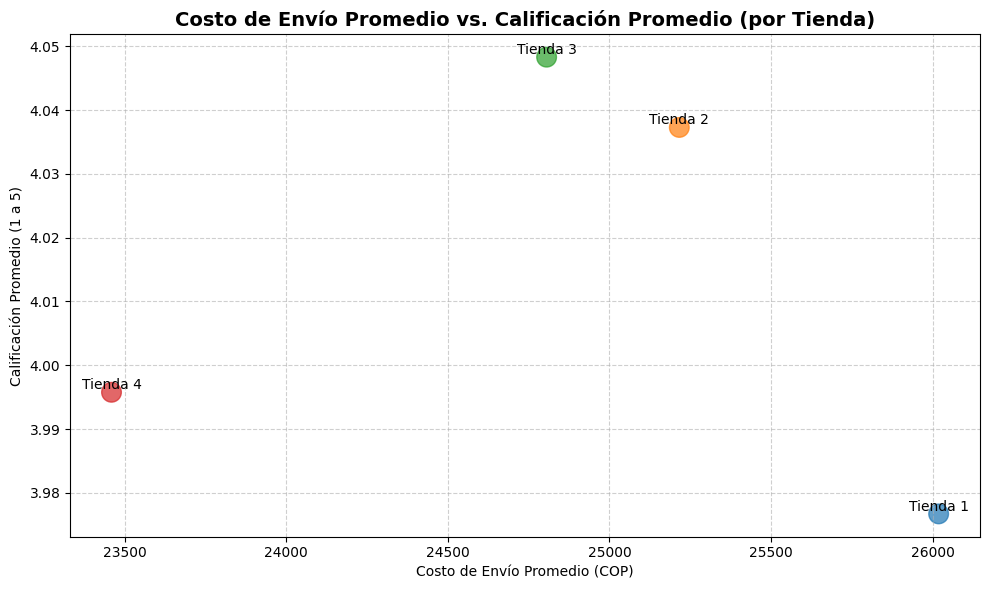

In [ ]:
costo_envio_prom = [tienda['Costo de envío'].mean(), tienda2['Costo de envío'].mean(), tienda3['Costo de envío'].mean(), tienda4['Costo de envío'].mean()]
calificacion_prom = [tienda['Calificación'].mean(), tienda2['Calificación'].mean(), tienda3['Calificación'].mean(), tienda4['Calificación'].mean()]

plt.figure(figsize=(10,6))
plt.scatter(costo_envio_prom, calificacion_prom, s=200, alpha=0.7, color=colores_alaska[:4])

for i, txt in enumerate(tiendas):
    plt.annotate(txt, (costo_envio_prom[i], calificacion_prom[i]),
                fontsize=10, ha='center', va='bottom')

plt.title('Costo de Envío Promedio vs. Calificación Promedio (por Tienda)',
         fontsize=14, fontweight='bold')
plt.xlabel('Costo de Envío Promedio (COP)')
plt.ylabel('Calificación Promedio (1 a 5)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


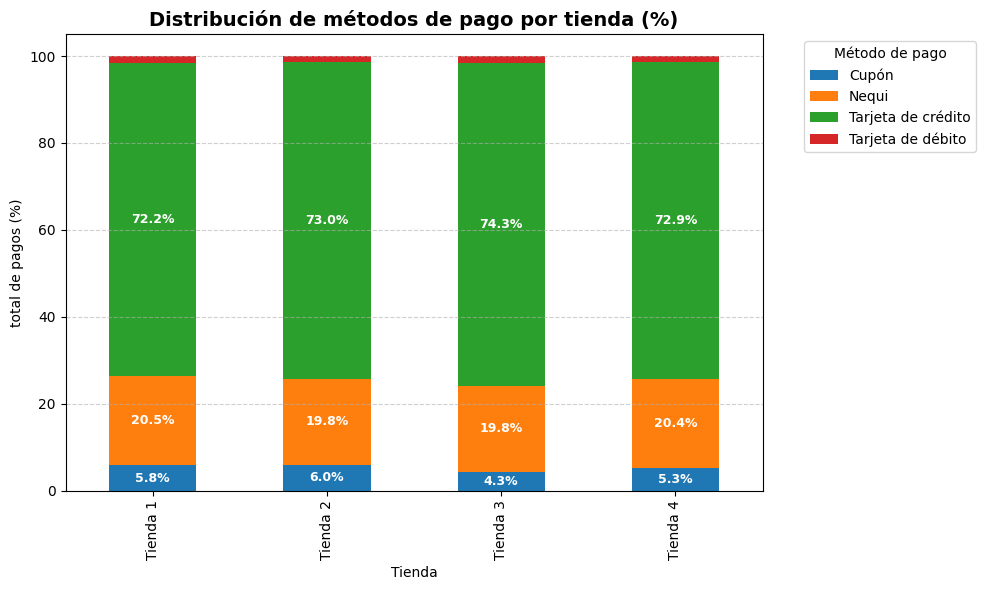

In [ ]:
metodos = pd.concat([
    tienda.assign(Tienda='Tienda 1'),
    tienda2.assign(Tienda='Tienda 2'),
    tienda3.assign(Tienda='Tienda 3'),
    tienda4.assign(Tienda='Tienda 4')
])

tabla = metodos.groupby(['Tienda', 'Método de pago']).size().unstack(fill_value=0)
tabla_pct = tabla.div(tabla.sum(axis=1), axis=0) * 100

plt.figure(figsize=(10,6))
ax = tabla_pct.plot(kind='bar', stacked=True, color=colores_alaska[:4], ax=plt.gca())

for container in ax.containers:
    labels = [f'{v.get_height():.1f}%' if v.get_height() > 3 else '' for v in container]
    ax.bar_label(container, labels=labels, label_type='center', fontsize=9, color='white', fontweight='bold')

plt.title('Distribución de métodos de pago por tienda (%)', fontsize=14, fontweight='bold')
plt.ylabel('total de pagos (%)')
plt.xlabel('Tienda')
plt.legend(title='Método de pago', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# **Informe de Evaluación para la Venta de Tienda**

## **Introducción**

El propósito de este análisis es determinar cuál de las cuatro tiendas representa la mejor opción para ser vendida y poder iniciar un nuevo emprendimiento. Para ello, se consideraron distintos factores de desempeño: ingresos totales, categorías de productos más y menos vendidas, calificaciones promedio de los clientes, productos destacados y el costo promedio de envío.  

El objetivo es identificar aquella tienda que, en comparación con las demás, presenta un **rendimiento más débil o un balance menos favorable entre rentabilidad, satisfacción del cliente y eficiencia operativa**, de modo que su venta resulte una decisión estratégica para optimizar recursos.

---

## **Desarrollo del análisis**

### **1. Ingresos Totales**


| Tienda  | Ingreso Total ($)    |
|----------|-------------------:|
| Tienda 1 | 1,150,880,400 |
| Tienda 2 | 1,116,343,500 |
| Tienda 3 | 1,098,019,600 |
| Tienda 4 | 1,038,375,700 |

**Análisis:**  
La **Tienda 4** presenta los ingresos más bajos, con una diferencia de más de $100 millones respecto a la Tienda 1. Este dato sugiere un menor volumen de ventas o un posicionamiento menos efectivo en el mercado.

---

### **2. Categorías de Productos**

La Tienda 4 muestra un comportamiento irregular: aunque tiene buenos resultados en **Juguetes (338 ventas)** y **Artículos para el hogar (201 ventas)**, su rendimiento es más bajo en **Electrodomésticos (254)** e **Instrumentos musicales (170)**, en comparación con otras tiendas.  

Por otro lado, la Tienda 3 domina en **Muebles (499)** y **Electrónicos (451)**, dos categorías de alto valor comercial, mientras que la Tienda 1 mantiene un volumen más equilibrado.  

**Análisis:**  
La **Tienda 4** concentra su fuerza en categorías de menor rentabilidad promedio y muestra debilidades en productos de alto valor, lo que limita su potencial de crecimiento.

---

### **3. Calificación Promedio de Clientes**

| Tienda | Calificación Promedio (1 a 5) |
|---------|-----------------------|
| Tienda 3 | 4.05 |
| Tienda 2 | 4.04 |
| Tienda 4 | 4.00 |
| Tienda 1 | 3.98 |

**Análisis:**  
Aunque la Tienda 4 no tiene la calificación más baja, su puntuación promedio (4.00) es apenas superior a la de la Tienda 1, y menor que la de la Tienda 3 y la Tienda 2. Esto indica una satisfacción moderada, sin destacar positivamente frente a las demás.

---

### **4. Productos Más y Menos Vendidos**

En la Tienda 4, los productos más vendidos son la **Cama box**, la **Cubertería** y algunos artículos de cocina o descanso, lo que sugiere un enfoque en bienes de rotación media.  
Sin embargo, sus **productos menos vendidos** incluyen artículos de alto valor como **Refrigeradores** y **Guitarras eléctricas**, lo que evidencia menor tracción en productos de margen alto.

**Análisis:**  
La combinación de baja rotación en artículos premium y una oferta concentrada en bienes de menor rentabilidad hace que la Tienda 4 tenga un **perfil de ventas menos competitivo**.

---

### **5. Costo de Envío Promedio**

| Tienda | Costo Promedio de Envío ($) |
|---------|--------------------------|
| Tienda 1 | 26,019 |
| Tienda 2 | 25,216 |
| Tienda 3 | 24,806 |
| Tienda 4 | 23,459 |

**Análisis:**  
La **Tienda 4** tiene el costo de envío más bajo, lo que es positivo en términos logísticos. Sin embargo, este ahorro no se traduce en una mejora proporcional de ingresos ni en mayor volumen de ventas, lo que sugiere que la reducción de costos no ha compensado sus debilidades comerciales.

---

## **Conclusión y Recomendación**

Tras analizar el rendimiento general, se concluye que la **Tienda 4** es la opción más conveniente para vender (deshacerse de ella).  

**Justificación:**

- Es la **tienda con menores ingresos totales**.  
- Su **estructura de ventas** se concentra en productos de baja o media rentabilidad, con menor desempeño en categorías estratégicas como muebles y electrónicos.  
- Aunque su costo de envío es el más bajo, **no logra una ventaja competitiva suficiente** para compensar sus debilidades comerciales.  
- Su **calificación de clientes es intermedia**, sin mostrar un valor diferencial frente a las demás tiendas.  

En contraste, las Tiendas 1, 2 y 3 presentan fortalezas claras: mayores ingresos, mejor valoración del cliente y ventas más equilibradas en productos de alto valor. En especial, la **Tienda 3** se destaca como la más estable y rentable a largo plazo.

**Por tanto, se recomienda proceder con la venta de la *Tienda 4*,** ya que su rentabilidad y proyección son inferiores al resto. Esta acción permitiría liberar recursos y concentrar esfuerzos en las tiendas con mayor potencial de crecimiento y satisfacción del cliente.
